# 隐藏层

简单/线性的模型在处理复杂问题的时候可能会失效

线性意味着单调假设,任何特征的增大都会导致模型的输出增大/减小,然而我们很容易找到违反单调性的例子,比如体温预测死亡率：这是一个非线性的关系。

+ 当你的体温低于37摄氏度时，体温越低，死亡的风险可能越高（比如失温）
+ 当你的体温高于37摄氏度时，体温越高，死亡的风险也越高（比如高烧）
+ 37摄氏度就是一个“拐点”。在这点之前和之后，体温和风险的关系是不同的。这种有“拐点”的关系就不是单调的，也就是非线性的。用一个简单的线性模型去处理，就会出错。



或者猫和狗的图片分类：这是一个更复杂的例子。

+ 图片由很多像素点组成，每个像素点都有一个值（比如亮度）。
+ 线性模型会认为，某个像素点的值越大，就越可能是一只猫；或者某个像素点的值越小，就越可能是一只猫。
+ 这个假设是错误的。判断一张图片是猫还是狗，不取决于某一个像素点本身的值有多大，而是取决于所有像素点的组合、排布和上下文关系。比如，像素点A和像素点B的相对位置，以及它们周围像素点的颜色和亮度，才能共同构成一个耳朵或眼睛的形状。
+ 这种复杂的、由多个元素相互作用构成的关系，是简单的线性模型完全无法理解和处理的。


解决这些问题的办法就是采用**深度神经网络**

+ 深度神经网络不依赖于简单的线性关系。
+ 它会通过隐藏层（就是我们上次聊到的那个概念）来学习数据中那些复杂的、非线性的关系。
+ 在猫狗分类的例子中，神经网络会通过处理大量的图片，自动地从像素点中学习并抽象出更高维度的特征，比如“耳朵的形状”、“毛发的纹理”、“眼睛的轮廓”等等。
+ 这些抽象出来的特征才是真正能用来区分猫和狗的关键，而不是单个像素点的值。

简单来说，线性模型只能处理简单的“因果关系”，而深度神经网络可以处理复杂的“相互作用关系”。

隐藏层的作用，就是通过多重、非线性的处理，让模型能够学习到数据中那些复杂的、非线性的关系。这就好比一个高级厨师，会用各种复杂的烹饪手法来处理食材，最终做出更美味、更复杂的菜肴，而不是只会简单的煎和炒。

# 多层感知机

可以把多层感知机想象成“处理数据的小工厂”，它有三道工序：
- 输入层（Input Layer）：像工厂的原材料入口，接收原始数据，比如图里的\($x_1$,$x_2$,$x_3$,$x_4$\)。
- 隐藏层（Hidden Layer）：像中间处理车间，会对原始数据进行多重、复杂的加工，比如图里的\($h_1$,$h_2$,$h_3$,$h_4$,$h_5$\)。
- 输出层（Output Layer）：像成品出口，把最终加工好的结果送出去，比如图里的\($o_1$,$o_2$,$o_3$\)。

这种由多个“层”堆叠起来、一层一层处理数据的结构，就是多层感知机。

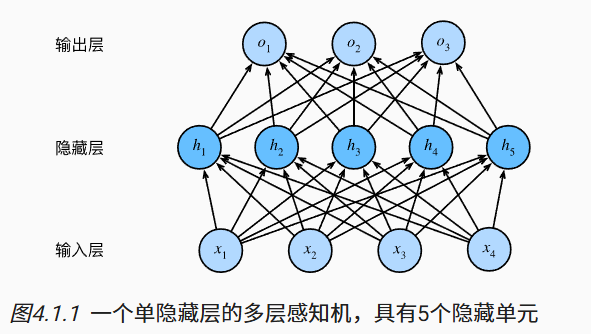

# 隐藏层的数学表达

你可以把**隐藏层**看作一个“翻译官”。它接收从**输入层**传来的原始信息，然后把它翻译成一种更高级、更抽象的“语言”。

$H = XW^{(1)} + b^{(1)}$ 就是在描述这个“翻译”过程：

* **X**：这是**输入数据**，也就是你要翻译的原始信息。
* **$W^{(1)}$** 和 **$b^{(1)}$**：这是“翻译官”的**词典和语法**。它们决定了如何将输入信息翻译成新的语言。
    * **$W^{(1)}$** 叫**权重（Weight）**，它告诉模型输入信息里的哪些部分更重要，哪些不重要。
    * **$b^{(1)}$** 叫**偏置（Bias）**，它像一个调整项，用来微调翻译后的结果。
* **H**：这是“翻译”出来的**新语言**，也就是**隐藏层**的输出。

简单来说，这个公式的意思就是：**用词典和语法对原始数据进行处理，得到隐藏层的输出。**


# 为什么需要激活函数？

如果只用上面的公式，**无论你堆叠多少个隐藏层，它本质上还是一个线性模型**。

想象一下，你有一串数字，你先对它“乘以2再加1”，然后把结果再“乘以3再加5”。

整个过程就是：$(x \times 2 + 1) \times 3 + 5$。

展开这个公式，你会发现：$6x + 8$。

看！不管你做了多少次“乘以...再加...”的操作，最后得到的结果依然是一个简单的“乘以...再加...”的线性形式。

**所以，如果不引入新的东西，无论你把多少个隐藏层堆在一起，模型的能力都和只有一个线性层时一样，没有任何提升。**

**激活函数（Activation Function）**就是那个**新的东西**。

它像一个“**开关**”或者“**过滤器**”，它会在每次线性变换（仿射变换）之后，对数据进行一次**非线性**的加工。

* **非线性**意味着，它不再是简单的“乘以...再加...”。
* 激活函数会让模型能够学习和表示那些更复杂、更弯曲、有“拐点”的关系。

比如，书里的公式 $H^{(1)} = \sigma_1(XW^{(1)} + b^{(1)})$，那个 **$\sigma$** 就是激活函数。

它的作用就是：**在数据经过一次线性计算后，给它一个“非线性”的扭转。**

**总结一下：**

**隐藏层的存在是为了让模型有更强的表达能力，而激活函数则是保证隐藏层能够真正发挥作用，而不是让所有层都“白搭”，最终退化成一个简单的线性模型。**

# 通用近似定理

如果一个神经网络只有一个隐藏层，并且隐藏层有足够多的神经元，它就可以模拟任何你能想到的复杂函数。

简单来说，只要设计得当，一个带隐藏层的神经网络，理论上可以解决任何问题。它就像一把“万能钥匙”，可以用来处理各种复杂的数据模式。

虽然一个单隐层网络能学习任何函数，但并不意味着我们应该尝试使用单隐藏层网络来解决所有问题。事实上，通过使用更深（而不是更广）的网络，我们可以更容易地逼近许多函数。

而一个“很深”的网络，就像给这个厨师配备了各种专业的厨具：一把刀用来切菜，另一把用来剁肉，还有一个专门的机器用来榨汁。每一层都扮演着一个专业的角色，把原始数据一步步处理成更抽象、更高维度的特征，最终高效地解决问题。

# 激活函数
1. ReLU函数
2. sigmoid函数
3. tanh函数

**未完成:激活函数,多层感知机的实现**